In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches

In [2]:
#armar colormap para agua y tierra
c_agua=plt.cm.Blues_r(np.linspace(0,0.75,256))
c_terr=plt.cm.Greens_r(np.linspace(0,0.75,256))
cols = np.vstack((c_agua, c_terr))
cmap=cm.colors.LinearSegmentedColormap.from_list("q", cols)

### Analizar un unico archivo .grd y una boya

In [10]:
# Archivo nc (grd) a cargar
nc_file=r"G:\My Drive\UTFSM\memoria\tareas\tarea03\batis\bat_l3_serecoq_conf1.grd"

# Coordenadas del mareografo
# Degar como lista vacía si no se quiere ver mareografo. ejemplo: []
lon_lat=[]

KeysView(<xarray.Dataset>
Dimensions:  (x: 760, y: 616)
Coordinates:
  * x        (x) float64 288.5 288.5 288.5 288.5 ... 288.9 288.9 288.9 288.9
  * y        (y) float64 -30.05 -30.05 -30.05 -30.05 ... -29.73 -29.73 -29.73
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        bat_l3_serecoq_conf1.grd
    history:      File written by MATLAB function grdwrite2.m
    description:  Created 15-May-2018 11:39:43
    GMT_version:  4.x)

Espaciamiento
 dx [arcseg]:  1.8725328947367883
 dy [arcseg]:  1.8719561688311481

Limites en x e y
 x:  288.5023356119797   288.89764811197966
 y:  -30.047655741373667   -29.72734324137367


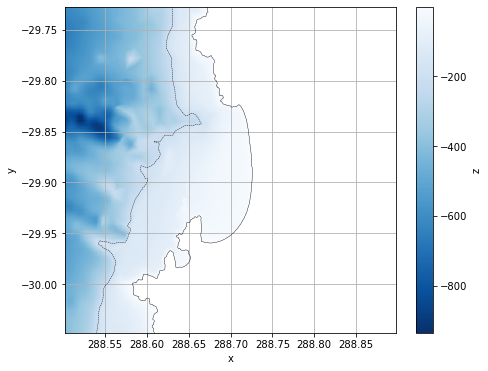

In [11]:
# ver contenidos archivo nc (grd)
data_nc=xr.open_dataset(nc_file)

with data_nc as ds:
  print(ds.keys()) # muestra contenido del archivo .grd

print()
print('Espaciamiento')
print(' dx [arcseg]: ',np.abs(data_nc.x.values[-1]-data_nc.x.values[0])*3600/(len(data_nc.x.values)))
print(' dy [arcseg]: ',np.abs(data_nc.y.values[-1]-data_nc.y.values[0])*3600/(len(data_nc.y.values)))
print()
print('Limites en x e y')
print(' x: ',data_nc.x.min().values,' ',data_nc.x.max().values)
print(' y: ',data_nc.y.min().values,' ',data_nc.y.max().values)

#Plotear batimetria
variable=data_nc.z.where(data_nc.z<=0)

#divnorm = cm.colors.DivergingNorm(vmin=data_nc.deformed_bathy.min(), vcenter=0, vmax=data_nc.deformed_bathy.max())

variable.plot.imshow(aspect=ds.dims['x'] / ds.dims['y'],size=6,cmap='Blues_r')
                          #,cmap=cmap,norm=divnorm)   #variable de interes
data_nc.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4) #curva de nivel 0 y 200m

#profundidad de la ubicacion de la boya
if lon_lat!=[]:
    z_boya=data_nc.z.sel(x=lon_lat[0],y=lon_lat[1],method="nearest").values.item()
    plt.scatter(lon_lat[0],lon_lat[1],color="r")
    print('Prof. mareografo: ',z_boya)
    
plt.grid()
plt.show()
#plt.savefig(nombre_archivo+'_'+nombre_variable+'.png',dpi=300) !!!!Falta arreglar nonmbre de archivo



### Plotear dominios y mareografos

In [5]:
# INPUT

# grilla de base(la mas grande)
# Degar como lista vacía si no se quiere ver mareografo. ejemplo: []
grd_base=[
r"G:\My Drive\UTFSM\memoria\batimetrias\L0_v3.grd"
]

#grillas anidadas
batis=[
    r"G:\My Drive\UTFSM\memoria\tareas\tarea03\batis\bat_l2_quin2sano_conf1.grd"
    ,r"G:\My Drive\UTFSM\memoria\tareas\tarea03\batis\bat_l2_serecoq_conf1.grd"
    ,r"G:\My Drive\UTFSM\memoria\tareas\tarea03\batis\bat_l3_quin2valp_conf1.grd"
    ,r"G:\My Drive\UTFSM\memoria\tareas\tarea03\batis\bat_l3_serecoq_conf1.grd"
]

# archivo ts.xy
ts_file=[
    r"G:\My Drive\UTFSM\memoria\tareas\tarea03\ts_coq_vlp.xy"
]

etiquetas=['coqu','ptal','pich','qtro','valp','sano'] # etiquetas o ubicaciones de los mareografos a plotear (en orden)

L0_v3.grd
 dx [arcseg]:  29.946796532013973
 dy [arcseg]:  29.97900898740989

bat_l2_quin2sano_conf1.grd
 dx [arcseg]:  7.488905325443787
 dy [arcseg]:  7.491238317757009

bat_l2_serecoq_conf1.grd
 dx [arcseg]:  7.486795774647743
 dy [arcseg]:  7.490985576923058

bat_l3_quin2valp_conf1.grd
 dx [arcseg]:  1.873030462184917
 dy [arcseg]:  1.8731098790322305

bat_l3_serecoq_conf1.grd
 dx [arcseg]:  1.8725328947367883
 dy [arcseg]:  1.8719561688311481



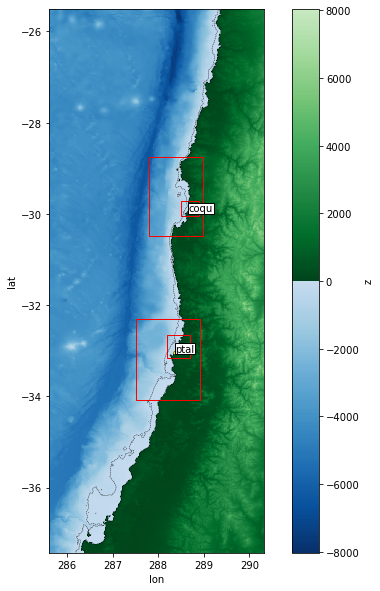

In [6]:
grd_base.extend(batis)
batis=grd_base

data_base=xr.open_dataset(batis[0]) # carga batimetria de base (la mas grande)

fig,ax1=plt.subplots(figsize=(10,10)) # genera figura en donde iran los dibujos
data_base.z.plot.imshow(cmap=cmap,ax=ax1) # plotea batimetria de base, en ax1
data_base.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4,ax=ax1) #plotea linea de costa y curva de nivel -200

print(os.path.basename(batis[0]))
print(' dx [arcseg]: '
      ,np.abs(data_base.lon.values[-1]-data_base.lon.values[0])*3600/(len(data_base.lon.values)))
print(' dy [arcseg]: '
      ,np.abs(data_base.lat.values[-1]-data_base.lat.values[0])*3600/(len(data_base.lat.values)))
print()

for i in range(1,len(batis)): # para cada bati de la lista (saltandose el primero)
    data_nc=xr.open_dataset(batis[i]) # carga la bati

    # Aqui se definen las caracteristicas principales del rectangulo
    inf_izq=[data_nc.x.values[0],data_nc.y.values[-1]] # coordenada inferior izquierda
    ancho=data_nc.x.values[-1]-data_nc.x.values[0] # ancho del rectangulo
    alto=data_nc.y.values[0]-data_nc.y.values[-1] # alto del rectangulo

    rect=patches.Rectangle((inf_izq[0],inf_izq[1]),ancho,alto,linewidth=1,edgecolor='r',facecolor='none') #genera el rectangulo
    ax1.add_patch(rect) # plotea el rectangulo, en ax1

    print(os.path.basename(batis[i]))
    print(' dx [arcseg]: ',np.abs(data_nc.x.values[-1]-data_nc.x.values[0])*3600/(len(data_nc.x.values)))
    print(' dy [arcseg]: ',np.abs(data_nc.y.values[-1]-data_nc.y.values[0])*3600/(len(data_nc.y.values)))
    print()

# Mareografos:
#Lee la ubicacion de los mareografos desde un archivo ts.xy   
if ts_file!=[]:
    
    coords=[] # aqui se guardaran las coordenadas del archivo .xy
    with open(ts_file[0], 'r') as reader: # abre el archivo
        for line in reader.readlines()[1:]: # para cada linea, saltandose la primera
            line = line.replace('\n','') # reemplaza saltos de linea por espacios en blanco
            line=line.rsplit(sep=' ') # Separa la linea en donde haya espacios
            coords.append(line) #agrega las coordenadas (texto a la lista coords)
    
    coords=np.array(coords) # transforma la lista a formato np.array
    coords=coords.astype(np.float) # pasa de sting a numero (float)
    
    ax1.scatter(coords[:,0],coords[:,1],c='yellow',s=8) # plotea mareografos de archivo .xy en ax1
    
    for etiqueta, x, y in zip(etiquetas, coords[:, 0], coords[:, 1]): #agregar etiquetas, lo encontre en internet
        plt.annotate(etiqueta,xy=(x, y),bbox=dict(boxstyle='square,pad=0.05',fc='white')) # falta afinar la ubicacion de las etiquetas

ax1.set_aspect('equal') # lo deja en la misma escala horizontal y vertical
plt.show() # muestra el ploteo